# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [42]:
import pandas as pd
import plotly.express as px

# Notebook Presentation

In [20]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [21]:
df_apps = pd.read_csv('apps.csv')

In [22]:
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [23]:
df_apps.shape

(10841, 12)

In [24]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [25]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
810,AH of Rocky Hill,MEDICAL,NaN,0,29.00,100,Free,0,Everyone,Medical,"November 24, 2017",4.0.3 and up
10142,Adobe Photoshop Express:Photo Editor Collage M...,PHOTOGRAPHY,4.20,914917,6.90,"50,000,000",Free,0,Everyone,Photography,"July 22, 2018",4.4 and up
6568,Sleep Sounds,HEALTH_AND_FITNESS,4.80,51227,28.00,"1,000,000",Free,0,Everyone,Health & Fitness,"July 13, 2018",4.0.3 and up
10821,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.30,9231613,12.00,"1,000,000,000",Free,0,Everyone,Travel & Local,"July 31, 2018",Varies with device
10673,Hill Climb Racing,GAME,4.40,8923818,63.00,"100,000,000",Free,0,Everyone,Racing,"July 2, 2018",4.2 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [26]:
df_apps = df_apps.drop(['Last_Updated','Android_Ver'],axis=1)
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business


### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [27]:
df_apps['Rating'].isna().values.sum()

1474

In [28]:
df_apps_clean = df_apps[df_apps['Rating'].isna() == False]

print(df_apps_clean['Rating'].isna().values.sum())
df_apps_clean.head()



0


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical


### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [29]:
df_apps.duplicated().values.sum()

485

In [30]:
df_apps[df_apps.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [31]:
df_apps_clean = df_apps_clean.drop_duplicates()

# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [37]:
df_apps_clean.sort_values(by='Rating', ascending=False).head(20)
# df_apps_clean.sort_values('Size_MBs', ascending=False)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1573,FHR 5-Tier 2.0,MEDICAL,5.00,2,1.20,500,Paid,$2.99,Everyone,Medical
1096,BG Guide,TRAVEL_AND_LOCAL,5.00,3,2.40,100,Free,0,Everyone,Travel & Local
1095,Morse Player,FAMILY,5.00,12,2.40,100,Paid,$1.99,Everyone,Education
1092,DG TV,NEWS_AND_MAGAZINES,5.00,3,5.70,100,Free,0,Everyone,News & Magazines
1083,A-Y Collection,SHOPPING,5.00,2,2.90,100,Free,0,Teen,Shopping
1076,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.00,1,2.90,100,Free,0,Everyone,Art & Design
1064,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.60,100,Free,0,Everyone,Education
1060,Free coupons and vouchers,FINANCE,5.00,4,5.90,100,Free,0,Everyone,Finance
1049,Helping BD,LIFESTYLE,5.00,15,4.50,100,Free,0,Everyone,Lifestyle


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [38]:
df_apps_clean.sort_values('Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
7926,Post Bank,FINANCE,4.50,60449,100.00,"1,000,000",Free,0,Everyone,Finance
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
9945,Ultimate Tennis,SPORTS,4.30,183004,100.00,"10,000,000",Free,0,Everyone,Sports
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [39]:
df_apps_clean.sort_values('Reviews', ascending=False).head(50)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10811,Facebook,SOCIAL,4.10,78128208,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10797,WhatsApp Messenger,COMMUNICATION,4.40,69109672,3.50,"1,000,000,000",Free,0,Everyone,Communication
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social
10790,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56646578,3.50,"1,000,000,000",Free,0,Everyone,Communication
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10652,Clash of Clans,GAME,4.60,44893888,98.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [48]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Everyone           7094
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

In [51]:

# ratings = ratings.reset_index(drop=True)
# fig = px.pie(labels=ratings.index, values=ratings.values)
# fig.show()

C:\Users\JGarza\miniconda3\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



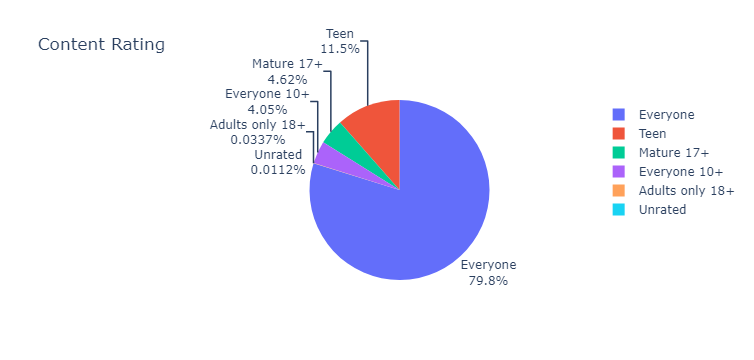

In [52]:
fig = px.pie(labels=ratings.index,
values=ratings.values,
title="Content Rating",
names=ratings.index,
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

C:\Users\JGarza\miniconda3\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



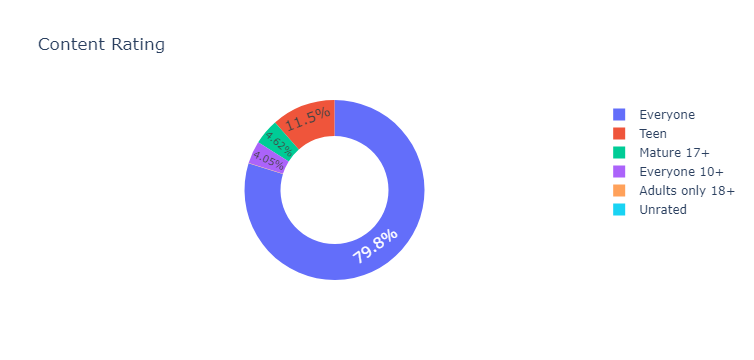

In [53]:
fig = px.pie(labels=ratings.index,
values=ratings.values,
title="Content Rating",
names=ratings.index,
hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [55]:
df_apps_clean.Installs.describe()

count          8891
unique           19
top       1,000,000
freq           1486
Name: Installs, dtype: object

In [56]:
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8891 entries, 21 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8891 non-null   object 
 1   Category        8891 non-null   object 
 2   Rating          8891 non-null   float64
 3   Reviews         8891 non-null   int64  
 4   Size_MBs        8891 non-null   float64
 5   Installs        8891 non-null   object 
 6   Type            8891 non-null   object 
 7   Price           8891 non-null   object 
 8   Content_Rating  8891 non-null   object 
 9   Genres          8891 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 764.1+ KB


In [57]:
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',', "")
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,699
5000,426
10000,989


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [58]:
df_apps_clean.Price.describe()

count     8891
unique      73
top          0
freq      8278
Name: Price, dtype: object

In [60]:
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace('$', "",regex=True)
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)
 
df_apps_clean.sort_values('Price', ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
1331,most expensive app (H),FAMILY,4.30,6,1.50,100,Paid,399.99,Everyone,Entertainment
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance
2394,I am Rich!,FINANCE,3.80,93,22.00,1000,Paid,399.99,Everyone,Finance


### The most expensive apps sub $250

In [61]:
df_apps_clean = df_apps_clean[df_apps_clean['Price'] < 250]
df_apps_clean.sort_values('Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
4264,Golfshot Plus: Golf GPS,SPORTS,4.10,3387,25.00,50000,Paid,29.99,Everyone,Sports


### Highest Grossing Paid Apps (ballpark estimate)

In [62]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9224,Minecraft,FAMILY,4.50,2375336,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
6856,Threema,COMMUNICATION,4.50,51110,3.50,1000000,Paid,2.99,Everyone,Communication,"2,990,000.00"
7044,Tasker,TOOLS,4.60,43045,3.40,1000000,Paid,2.99,Everyone,Tools,"2,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [63]:
df_apps_clean.Category.nunique()


33

In [65]:
top10_category = df_apps_clean.Category.value_counts()[:10]
top10_category

FAMILY             1714
GAME               1074
TOOLS               733
PRODUCTIVITY        334
FINANCE             311
PERSONALIZATION     310
COMMUNICATION       307
PHOTOGRAPHY         304
MEDICAL             302
LIFESTYLE           301
Name: Category, dtype: int64

### Vertical Bar Chart - Highest Competition (Number of Apps)

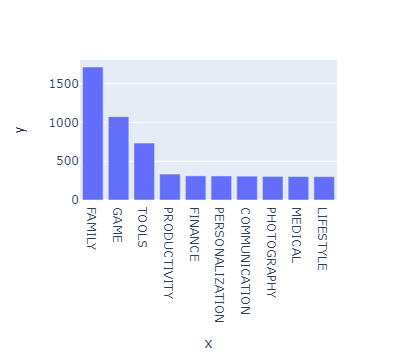

In [68]:
bar = px.bar(x = top10_category.index, # index = category name
             y = top10_category.values)
 
bar.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [70]:
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)

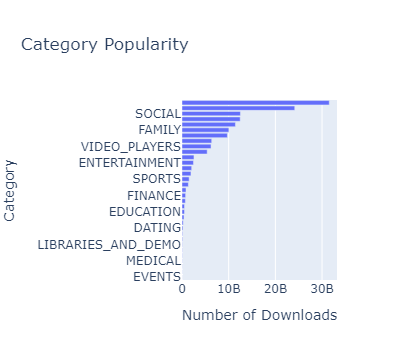

In [71]:
h_bar = px.bar(x = category_installs.Installs,
               y = category_installs.index,
               orientation='h',
               title='Category Popularity')
 
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [75]:
cat_number = df_apps_clean.groupby('Category').agg({'App': pd.Series.count})

In [79]:
cat_merged_df = pd.merge(cat_number, category_installs, on='Category', how="inner")
print(f'The dimensions of the DataFrame are: {cat_merged_df.shape}')
cat_merged_df.sort_values('Installs', ascending=False).head(10)

The dimensions of the DataFrame are: (33, 2)


,App,Installs
Category,,
GAME,1074,31543862717
COMMUNICATION,307,24152241530
SOCIAL,244,12513841475
PRODUCTIVITY,334,12463070180
TOOLS,733,11440724500
FAMILY,1714,10041105490
PHOTOGRAPHY,304,9721243130
TRAVEL_AND_LOCAL,205,6361859300
VIDEO_PLAYERS,160,6221897200


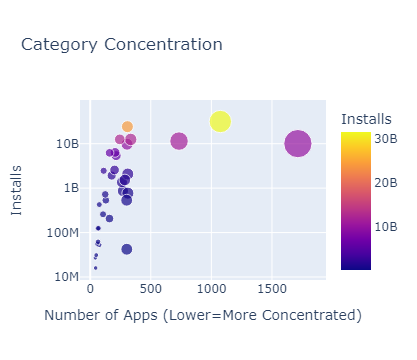

In [77]:
scatter = px.scatter(cat_merged_df, # data
                    x='App', # column name
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=cat_merged_df.index,
                    color='Installs')
 
scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))
 
scatter.show()

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [80]:
len(df_apps_clean.Genres.unique())

115

In [81]:
df_apps_clean.Genres.value_counts().sort_values(ascending=True)[:5]

Lifestyle;Pretend Play                 1
Strategy;Creativity                    1
Parenting;Brain Games                  1
Health & Fitness;Action & Adventure    1
Arcade;Pretend Play                    1
Name: Genres, dtype: int64

In [82]:
# Split the strings on the semi-colon and then .stack them.
stack = df_apps_clean.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

We now have a single column with shape: (9323,)
Number of genres: 53


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

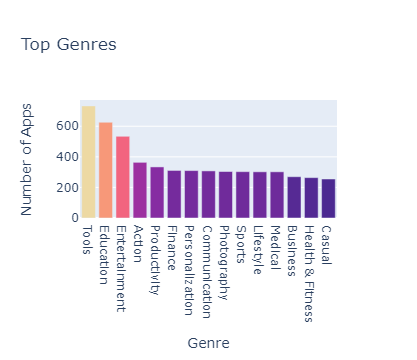

In [83]:
bar = px.bar(x = num_genres.index[:15], # index = category name
             y = num_genres.values[:15], # count
             title='Top Genres',
             hover_name=num_genres.index[:15],
             color=num_genres.values[:15],
             color_continuous_scale='Agsunset')
 
bar.update_layout(xaxis_title='Genre',
yaxis_title='Number of Apps',
coloraxis_showscale=False)
 
bar.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [87]:
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,59
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


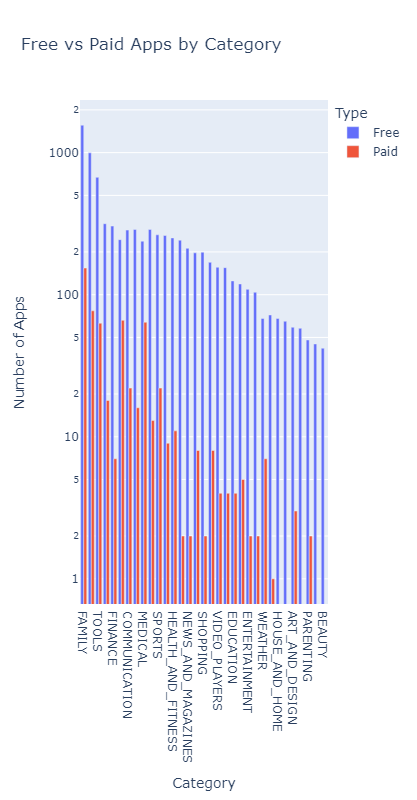

In [97]:
g_bar = px.bar(df_free_vs_paid,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group'
               # ,width=800
               , height=800
              )
 
g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
g_bar.show()

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


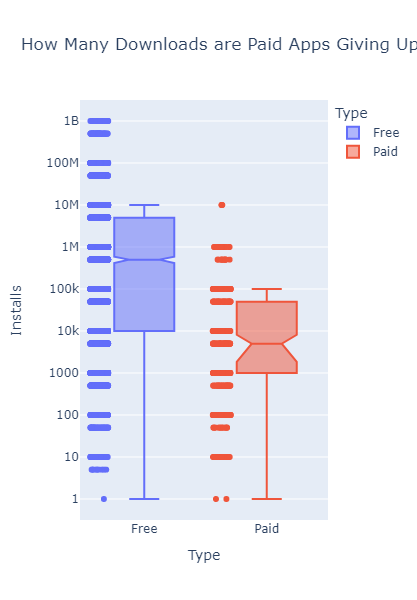

In [96]:
box = px.box(df_apps_clean,
             y='Installs',
             x='Type',
             color='Type',
             notched=True,
             points='all',
             title='How Many Downloads are Paid Apps Giving Up?'
            , height=600
            )
 
box.update_layout(yaxis=dict(type='log'))
 
box.show()

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

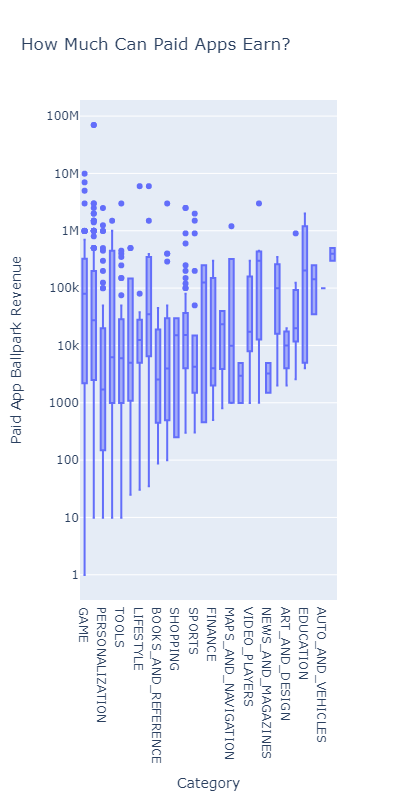

In [99]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']
box = px.box(df_paid_apps, 
             x='Category', 
             y='Revenue_Estimate',
             title='How Much Can Paid Apps Earn?'
            # ,width=800, 
             ,height=800
            )

 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))
 
 
box.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [98]:
df_paid_apps.Price.median()

2.99